### Descubra as melhores notas de matemática do ENEM 2016

Você deverá criar um modelo para prever a nota da prova de matemática de quem participou do ENEM 2016. Para isso, usará Python, Pandas, Sklearn e Regression.



**Importações iniciais**

In [109]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

**Leitura da base de dados**

In [110]:
base_train = pd.read_csv('train.csv')
base_test = pd.read_csv('test.csv')

**Análise dos dados**

In [111]:
base_test.columns

Index(['NU_INSCRICAO', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA', 'NU_IDADE',
       'TP_SEXO', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'TP_DEPENDENCIA_ADM_ESC', 'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DISLEXIA', 'IN_DISCALCULIA', 'IN_SABATISTA', 'IN_GESTANTE',
       'IN_IDOSO', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC', 'CO_PROVA_MT',
       'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'TP_LINGUA',
       'TP_STATUS_REDACAO', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3',
       'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002',
       'Q006', 'Q024', 'Q025', 'Q026', 'Q027', 'Q047'],
      dtype='object')

**Verificação da correlação dos dados**

In [112]:
base_train.corr()

,Unnamed: 0,NU_ANO,CO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,NU_IDADE,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,...,Q032,Q033,Q034,Q035,Q036,Q037,Q038,Q039,Q040,Q041
Unnamed: 0,1.000000,NaN,-0.007258,-0.007250,-0.007201,0.003678,0.005707,-0.006217,-0.004527,-0.004615,...,0.001520,0.018074,0.001693,-0.008141,0.002724,-0.004914,0.003906,0.001002,-0.010967,-0.029937
NU_ANO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CO_MUNICIPIO_RESIDENCIA,-0.007258,NaN,1.000000,0.999865,-0.002296,0.020813,-0.236178,0.009710,0.865294,0.865216,...,0.004115,-0.030114,-0.050304,-0.050138,-0.040668,-0.013479,-0.032710,-0.094862,-0.077456,-0.033205
CO_UF_RESIDENCIA,-0.007250,NaN,0.999865,1.000000,-0.002017,0.020947,-0.234786,0.009433,0.864791,0.864919,...,0.003968,-0.030345,-0.050096,-0.049292,-0.040688,-0.013647,-0.032467,-0.094113,-0.076838,-0.033149
NU_IDADE,-0.007201,NaN,-0.002296,-0.002017,1.000000,0.533462,0.009675,-0.017713,-0.030711,-0.030259,...,-0.044791,0.025077,-0.030681,0.012739,0.021949,-0.003569,-0.035306,-0.069973,-0.010988,0.160526
TP_ESTADO_CIVIL,0.003678,NaN,0.020813,0.020947,0.533462,1.000000,0.004950,-0.012160,-0.000046,0.000243,...,-0.017455,-0.009670,-0.016354,-0.002580,0.025840,0.002294,-0.014725,-0.066346,-0.022736,0.108771
TP_COR_RACA,0.005707,NaN,-0.236178,-0.234786,0.009675,0.004950,1.000000,0.015761,-0.253524,-0.252162,...,-0.010398,0.004446,0.031514,0.026052,0.055185,0.086642,0.069298,0.046830,0.053556,0.020966
TP_NACIONALIDADE,-0.006217,NaN,0.009710,0.009433,-0.017713,-0.012160,0.015761,1.000000,NaN,NaN,...,0.013515,0.001575,-0.003419,-0.018290,-0.005285,0.032588,0.024112,0.011327,0.014847,0.008132
CO_MUNICIPIO_NASCIMENTO,-0.004527,NaN,0.865294,0.864791,-0.030711,-0.000046,-0.253524,NaN,1.000000,0.999860,...,-0.001793,-0.043358,-0.051102,-0.057239,-0.046998,-0.024174,-0.038666,-0.097273,-0.081490,-0.042237
CO_UF_NASCIMENTO,-0.004615,NaN,0.865216,0.864919,-0.030259,0.000243,-0.252162,NaN,0.999860,1.000000,...,-0.002089,-0.043492,-0.051094,-0.056401,-0.047069,-0.024201,-0.038305,-0.096666,-0.080963,-0.042134


In [113]:
base_test.columns

Index(['NU_INSCRICAO', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA', 'NU_IDADE',
       'TP_SEXO', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'TP_DEPENDENCIA_ADM_ESC', 'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DISLEXIA', 'IN_DISCALCULIA', 'IN_SABATISTA', 'IN_GESTANTE',
       'IN_IDOSO', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC', 'CO_PROVA_MT',
       'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'TP_LINGUA',
       'TP_STATUS_REDACAO', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3',
       'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002',
       'Q006', 'Q024', 'Q025', 'Q026', 'Q027', 'Q047'],
      dtype='object')

In [115]:
features = [
    'NU_NOTA_CN',
    'NU_NOTA_CH',
    'NU_NOTA_LC',
    'NU_NOTA_REDACAO',
    'NU_NOTA_COMP1',
    'NU_NOTA_COMP2',
    'NU_NOTA_COMP3',
    'NU_NOTA_COMP4',
    'NU_NOTA_COMP5']

features_corr = [
    'NU_NOTA_MT',
    'NU_NOTA_CN',
    'NU_NOTA_CH',
    'NU_NOTA_LC',
    'NU_NOTA_REDACAO',
    'NU_NOTA_COMP1',
    'NU_NOTA_COMP2',
    'NU_NOTA_COMP3',
    'NU_NOTA_COMP4',
    'NU_NOTA_COMP5']

**Verificação de valores faltantes**

Dentre as alternativas de tratar valores faltantes, a alternativa escolhida foi preenchê-los com os valores da média de cada coluna.

In [116]:
base_test[features].isnull().sum()

NU_NOTA_CN         1134
NU_NOTA_CH         1134
NU_NOTA_LC         1199
NU_NOTA_REDACAO    1199
NU_NOTA_COMP1      1199
NU_NOTA_COMP2      1199
NU_NOTA_COMP3      1199
NU_NOTA_COMP4      1199
NU_NOTA_COMP5      1199
dtype: int64

In [117]:
base_train[features].isnull().sum()

NU_NOTA_CN         3389
NU_NOTA_CH         3389
NU_NOTA_LC         3597
NU_NOTA_REDACAO    3597
NU_NOTA_COMP1      3597
NU_NOTA_COMP2      3597
NU_NOTA_COMP3      3597
NU_NOTA_COMP4      3597
NU_NOTA_COMP5      3597
dtype: int64

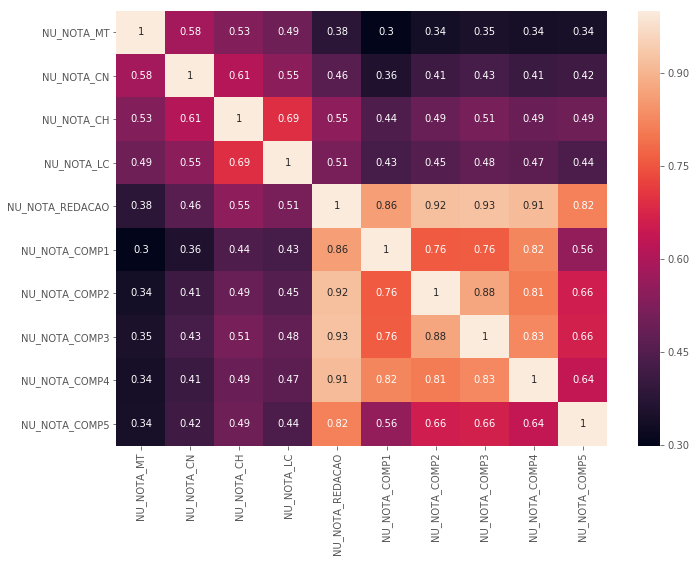

In [118]:
corr = base_train[features_corr].corr()
ax = plt.subplots(figsize=(11, 8))
sns.heatmap(corr,  annot=True, annot_kws={"size": 10})

In [119]:
base_train = base_train.loc[
      (base_train['NU_NOTA_CN'].notnull())  & (base_train['NU_NOTA_CN'] != 0) & (base_train['NU_NOTA_CH'].notnull())      & (base_train['NU_NOTA_CH'] != 0) 
    & (base_train['NU_NOTA_LC'].notnull())  & (base_train['NU_NOTA_LC'] != 0) & (base_train['NU_NOTA_REDACAO'].notnull()) & (base_train['NU_NOTA_REDACAO'] != 0)    
]

In [120]:
base_test = base_test.loc[
      (base_test['NU_NOTA_CN'].notnull())  & (base_test['NU_NOTA_CN'] != 0) & (base_test['NU_NOTA_CH'].notnull())      & (base_test['NU_NOTA_CH'] != 0) 
    & (base_test['NU_NOTA_LC'].notnull())  & (base_test['NU_NOTA_LC'] != 0) & (base_test['NU_NOTA_REDACAO'].notnull()) & (base_test['NU_NOTA_REDACAO'] != 0)    
]

In [121]:
base_test[features].isnull().sum()

NU_NOTA_CN         0
NU_NOTA_CH         0
NU_NOTA_LC         0
NU_NOTA_REDACAO    0
NU_NOTA_COMP1      0
NU_NOTA_COMP2      0
NU_NOTA_COMP3      0
NU_NOTA_COMP4      0
NU_NOTA_COMP5      0
dtype: int64

In [122]:
base_test['NU_NOTA_COMP1'].fillna(0,inplace=True)
base_test['NU_NOTA_COMP2'].fillna(0,inplace=True)
base_test['NU_NOTA_COMP3'].fillna(0,inplace=True)
base_test['NU_NOTA_COMP4'].fillna(0,inplace=True)
base_test['NU_NOTA_COMP5'].fillna(0,inplace=True)

base_train['NU_NOTA_COMP1'].fillna(0,inplace=True)
base_train['NU_NOTA_COMP2'].fillna(0,inplace=True)
base_train['NU_NOTA_COMP3'].fillna(0,inplace=True)
base_train['NU_NOTA_COMP4'].fillna(0,inplace=True)
base_train['NU_NOTA_COMP5'].fillna(0,inplace=True)

In [123]:
y_train = base_train['NU_NOTA_MT']
x_train = base_train[features]

x_test = base_test[features]
sc = StandardScaler()  
x_train = sc.fit_transform(x_train)  
x_test = sc.transform(x_test)

In [124]:
regressor = RandomForestRegressor(n_estimators = 10)                                                                  

In [125]:
regressor.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [126]:
y_pred = regressor.predict(x_test)

#y_pred_train = regressor.predict(x_train)

In [127]:
print('MAE:', metrics.mean_absolute_error(y_train, y_pred_train).round(8)  )
print('MSE:', metrics.mean_squared_error(y_train, y_pred_train).round(8) )  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)).round(8))

MAE: 25.13516443
MSE: 1162.78658577
RMSE: 34.09965668


In [137]:
result = pd.DataFrame()
result['NU_INSCRICAO'] = base_test['NU_INSCRICAO']
result['NU_NOTA_MT'] = np.around(y_pred_test, 2)

result.to_csv('answer.csv', index = False, header = True)

In [138]:
result.head()

,NU_INSCRICAO,NU_NOTA_MT
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,411.49
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,428.10
2,b38a03232f43b11c9d0788abaf060f7366053b6d,605.08
4,715494628a50142ce8cb17191cfe6d0f3cae0934,446.41
5,e656d6bad65c93fb2880f1eba5037008c8e75774,464.18
